In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

75.0


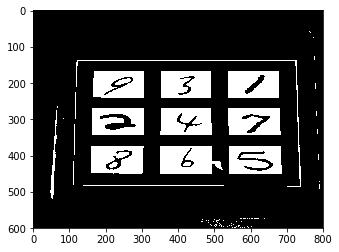

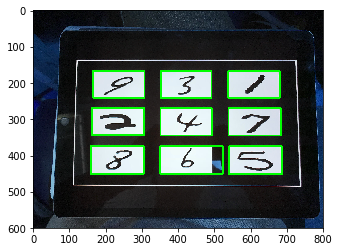

In [38]:
img = cv2.imread('./testimg.JPG')
img = cv2.resize(img, (800,600))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (5,5), 0)
#thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            #cv2.THRESH_BINARY,19,14)
ret3,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]
new_rects = []
for rect in rects:
    scale = rect[2] * 1.0 / rect[3];
    if scale >= 2.3 or scale <= 1.6 or rect[2] <= 40 or rect[2] >= 250:
        continue
    new_rects.append(rect)
new_rects = np.array(new_rects)
height = np.median(new_rects[:,3])
rects = [rect for rect in new_rects if rect[3] >= .95 * height]
for rect in rects:
    cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3)
plt.imshow(thresh, cmap='gray')
plt.show()
plt.imshow(img)
plt.show()

In [29]:
img.shape

(600, 800, 3)

In [27]:
cv2.boundingRect?